<a href="https://colab.research.google.com/github/gani0325/2022/blob/main/kaggle/BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2022-01-27

### Breast Cancer - kaggle
* https://bigdaheta.tistory.com/33 참고
* https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization 참고

#### 1. 라이브러리 import

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from sklearn import datasets

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

#### 2. 데이터 가져오기

In [ ]:
data = pd.read_csv("data.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

* 흠 거의 실수나 정수인가, Object 는 없낭

In [ ]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

* Unnamed: 32 하나 있땅

#### 3. 데이터 전처리

##### 1) diagnosis 숫자로

In [ ]:
data["diagnosis"].unique()

array(['M', 'B'], dtype=object)

* '양성종양(Benign tumor)'과 '악성종양(Malignant tumor)
* 악성종양을 1, 양성양성을 0

In [ ]:
def cancle(a):
    if 'M' in a :
        return 1
    else :
        return 0

data["판정"] = data["diagnosis"].apply(cancle)
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,판정
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN,1
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN,1
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN,1
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN,1
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN,1


##### 2) 필요없는거 drop

In [ ]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32', '판정'],
      dtype='object')

* id 필요없고, diagnosis 는 숫자로 했고, null 있는 Unnamed: 32 없애버려~!

In [ ]:
total = data.drop(columns= ["id", "diagnosis", "Unnamed: 32"])
total.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,판정
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


#### 4. train/test 분할

In [ ]:
X = total.drop(['판정'], axis = 1) # 칼럼으로
y = total["판정"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

* test_size에는 test set의 비율을 입력
* stratify에는 층 구분 변수이름을 입력 -> 각 층별로 나누어서 test_size비율 적용 추출
#### 
* shuffle=True 를 지정해주면 무작위 추출(random sampling)
* 체계적 추출(systematic sampling)을 하고 싶다면 shuffle=False를 지정
#### 
#### 
* random_state 는 재현가능성을 위해서 난수 초기값으로 아무 숫자나 지정

#### 5. 모델 구축

##### 1) voting : 뭐가 제일 낫나

* 다수의 분류기의 레이블 값 결정 확률을 모두 더하고 평균낸 확률 값이 가장 높은 레이블을 최종 보팅 결과값으로 선정 => 소프트 보팅
* 다수의 분류기가 예측한 예측값을 최종 보팅 결과값으로 선정 => 하드 보팅

In [ ]:
logistic = LogisticRegression( solver = "liblinear",
                        penalty = "l2",
                        C = 0.001,
                        random_state = 1)
tree = DecisionTreeClassifier(max_depth = None,
                        criterion="entropy",
                        random_state=1)
knn = KNeighborsClassifier(n_neighbors=1,
                        p = 2,
                        metric = "minkowski")

voting_estimators = [("logistic", logistic), ("tree", tree), ("knn", knn)]

voting = VotingClassifier(estimators=voting_estimators,
                        voting = "soft")

clf_labels1 = ["Logistic regression", "Decision Tree", "KNN", "Majority voting"]

all_clf1 = [logistic, tree, knn, voting]

##### 2) 배깅 : 여러 가지 분류 모델 중 한가지 모델에만 집중 모델 구축

In [ ]:
tree = DecisionTreeClassifier (max_depth= None,
                        criterion="entropy",
                        random_state=1)
forest = RandomForestClassifier(criterion="gini",
                        n_estimators=500,   # 데이터 샘플 몇개
                        random_state=1)     
clf_labels2 = ["Decision Tree", "Random Forest"]
all_clf2 = [tree, forest]


##### 3) 부스팅

In [ ]:
tree = DecisionTreeClassifier(max_depth=1,
                    criterion="entropy",
                    random_state=1)
adaboost = AdaBoostClassifier (base_estimator=tree,
                    n_estimators=500,
                    learning_rate = 0.1,
                    random_state=1)

clf_labels3 = ["Decision Tree", "Ada Boost"]
all_clf3 = [tree, adaboost]

##### 4) AUC

In [ ]:
for clf, label in zip(all_clf1, clf_labels1) :
    scores = cross_val_score(estimator=clf,
                    X = X_train,
                    y = y_train,
                    cv = 10,
                    scoring ="roc_auc")
    print("ROC AUC : %.3f ( +/- %.3f) [%s]"
            % (scores.mean(), scores.std(), label))

ROC AUC : 0.968 ( +/- 0.029) [Logistic regression]
ROC AUC : 0.923 ( +/- 0.046) [Decision Tree]
ROC AUC : 0.918 ( +/- 0.038) [KNN]
ROC AUC : 0.984 ( +/- 0.015) [Majority voting]


* 투표 기법이 좋다

In [ ]:
for clf, label in zip(all_clf2, clf_labels2) :
    scores = cross_val_score(estimator=clf,
                    X = X_train,
                    y = y_train,
                    cv = 10,
                    scoring ="roc_auc")
    print("ROC AUC : %.3f ( +/- %.3f) [%s]"
            % (scores.mean(), scores.std(), label))

ROC AUC : 0.923 ( +/- 0.046) [Decision Tree]
ROC AUC : 0.988 ( +/- 0.019) [Random Forest]


* 랜덤포레스트가 좋다

In [ ]:
for clf, label in zip(all_clf3, clf_labels3) :
    scores = cross_val_score(estimator=clf,
                    X = X_train,
                    y = y_train,
                    cv = 10,
                    scoring ="roc_auc")
    print("ROC AUC : %.3f ( +/- %.3f) [%s]"
            % (scores.mean(), scores.std(), label))

ROC AUC : 0.899 ( +/- 0.041) [Decision Tree]
ROC AUC : 0.993 ( +/- 0.013) [Ada Boost]


* AdaBoost 가 좋다

#### 6. ROC 곡선 그리기

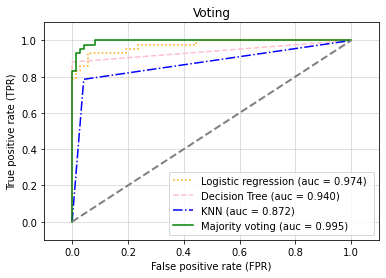

In [ ]:
colors = ["orange", "pink","blue", "green"]
linestyles = [':', "--", "-.", "-"]

for clf, label, clr, ls in zip(all_clf1, clf_labels1, colors, linestyles) :
    clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)[:,1]
    fpr, tpr, threshold = roc_curve(y_true = y_test,
                                    y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)

    plt.plot(fpr, tpr, color = clr, linestyle = ls,
                label ="%s (auc = %.3f) " %(label, roc_auc))

plt.legend(loc = "lower right")
plt.plot([0,1], [0,1], linestyle = "--", color = "gray", linewidth = 2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])

plt.grid(alpha = 0.5)

plt.xlabel("False positive rate (FPR)")
plt.ylabel("True positive rate (TPR)")

plt.title("Voting")
plt.show()

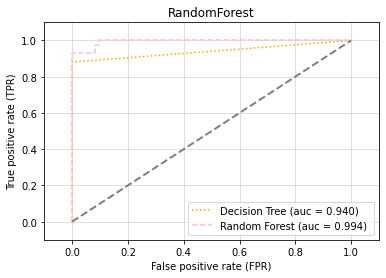

In [ ]:
colors = ["orange", "pink","blue", "green"]
linestyles = [':', "--", "-.", "-"]

for clf, label, clr, ls in zip(all_clf2, clf_labels2, colors, linestyles) :
    clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)[:,1]
    fpr, tpr, threshold = roc_curve(y_true = y_test,
                                    y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)

    plt.plot(fpr, tpr, color = clr, linestyle = ls,
                label ="%s (auc = %.3f) " %(label, roc_auc))

plt.legend(loc = "lower right")
plt.plot([0,1], [0,1], linestyle = "--", color = "gray", linewidth = 2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])

plt.grid(alpha = 0.5)

plt.xlabel("False positive rate (FPR)")
plt.ylabel("True positive rate (TPR)")

plt.title("RandomForest")
plt.show()

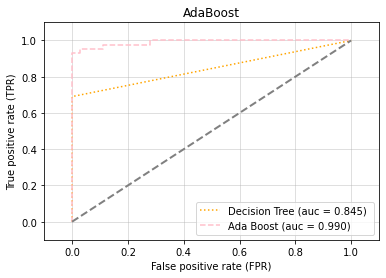

In [ ]:
colors = ["orange", "pink","blue", "green"]
linestyles = [':', "--", "-.", "-"]

for clf, label, clr, ls in zip(all_clf3, clf_labels3, colors, linestyles) :
    clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)[:,1]
    fpr, tpr, threshold = roc_curve(y_true = y_test,
                                    y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)

    plt.plot(fpr, tpr, color = clr, linestyle = ls,
                label ="%s (auc = %.3f) " %(label, roc_auc))

plt.legend(loc = "lower right")
plt.plot([0,1], [0,1], linestyle = "--", color = "gray", linewidth = 2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])

plt.grid(alpha = 0.5)

plt.xlabel("False positive rate (FPR)")
plt.ylabel("True positive rate (TPR)")

plt.title("AdaBoost")
plt.show()

#### 7. 정오 분류표

In [ ]:
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

print("RandomForest")
print("잘못 분류된 샘플 개수 : %d" %(y_test != y_pred).sum())
print("정확도 : %.3f" % accuracy_score(y_test, y_pred))
print("정밀도 : %.3f" % precision_score(y_true = y_test, y_pred = y_pred))
print("재현율 : %.3f" % recall_score(y_true=y_test, y_pred=y_pred))
print("F1 : %.3f" % f1_score(y_true=y_test, y_pred=y_pred))

RandomForest
잘못 분류된 샘플 개수 : 3
정확도 : 0.974
정밀도 : 1.000
재현율 : 0.929
F1 : 0.963


In [ ]:
adaboost.fit(X_train, y_train)

y_pred = forest.predict(X_test)

print("AdaBoost")
print("잘못 분류된 샘플 개수 : %d" %(y_test != y_pred).sum())
print("정확도 : %.3f" % accuracy_score(y_test, y_pred))
print("정밀도 : %.3f" % precision_score(y_true = y_test, y_pred = y_pred))
print("재현율 : %.3f" % recall_score(y_true=y_test, y_pred=y_pred))
print("F1 : %.3f" % f1_score(y_true=y_test, y_pred=y_pred))

AdaBoost
잘못 분류된 샘플 개수 : 3
정확도 : 0.974
정밀도 : 1.000
재현율 : 0.929
F1 : 0.963


#### 8. 최적화

In [ ]:
voting.get_params()

{'estimators': [('logistic',
   LogisticRegression(C=0.001, random_state=1, solver='liblinear')),
  ('tree', DecisionTreeClassifier(criterion='entropy', random_state=1)),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'flatten_transform': True,
 'n_jobs': None,
 'verbose': False,
 'voting': 'soft',
 'weights': None,
 'logistic': LogisticRegression(C=0.001, random_state=1, solver='liblinear'),
 'tree': DecisionTreeClassifier(criterion='entropy', random_state=1),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'logistic__C': 0.001,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 100,
 'logistic__multi_class': 'auto',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': 1,
 'logistic__solver': 'liblinear',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False,
 'tree__ccp_alpha': 0.0,
 'tree__class_wei

In [ ]:
params = {"logistic__C" : [0.001, 0.1, 100.0],
        "tree__max_depth" : [1, 2, 3, 4, 5],
        "knn__n_neighbors" : [1, 2, 3, 4, 5]}

grid = GridSearchCV(estimator=voting,
                    param_grid=params,
                    cv = 10,
                    scoring = "roc_auc",
                    )

grid.fit(X_train, y_train)

for i, _ in enumerate(grid.cv_results_["mean_test_score"]) :
    print("%.3f +/- %.3f %r"
            %(grid.cv_results_["mean_test_score"][i],
            grid.cv_results_["std_test_score"][i] / 2.0,
            grid.cv_results_["params"][i]))

0.973 +/- 0.013 {'knn__n_neighbors': 1, 'logistic__C': 0.001, 'tree__max_depth': 1}
0.980 +/- 0.010 {'knn__n_neighbors': 1, 'logistic__C': 0.001, 'tree__max_depth': 2}
0.984 +/- 0.007 {'knn__n_neighbors': 1, 'logistic__C': 0.001, 'tree__max_depth': 3}
0.987 +/- 0.006 {'knn__n_neighbors': 1, 'logistic__C': 0.001, 'tree__max_depth': 4}
0.986 +/- 0.006 {'knn__n_neighbors': 1, 'logistic__C': 0.001, 'tree__max_depth': 5}
0.982 +/- 0.007 {'knn__n_neighbors': 1, 'logistic__C': 0.1, 'tree__max_depth': 1}
0.986 +/- 0.007 {'knn__n_neighbors': 1, 'logistic__C': 0.1, 'tree__max_depth': 2}
0.988 +/- 0.005 {'knn__n_neighbors': 1, 'logistic__C': 0.1, 'tree__max_depth': 3}
0.989 +/- 0.005 {'knn__n_neighbors': 1, 'logistic__C': 0.1, 'tree__max_depth': 4}
0.988 +/- 0.005 {'knn__n_neighbors': 1, 'logistic__C': 0.1, 'tree__max_depth': 5}
0.985 +/- 0.008 {'knn__n_neighbors': 1, 'logistic__C': 100.0, 'tree__max_depth': 1}
0.985 +/- 0.008 {'knn__n_neighbors': 1, 'logistic__C': 100.0, 'tree__max_depth': 2}
0.

In [ ]:
print("최적의 파라미터 : %s" %grid.best_params_)
print("ACU : %.3f" % grid.best_score_)

최적의 파라미터 : {'knn__n_neighbors': 5, 'logistic__C': 100.0, 'tree__max_depth': 5}
ACU : 0.990


#### 9. 특성 중요도

* 랜덤 포레스트는 별도의 파라미터 튜닝 필요 없음

 1) perimeter_worst                0.124820
 2) concave points_worst           0.121855
 3) radius_worst                   0.121268
 4) area_worst                     0.107851
 5) concave points_mean            0.103403
 6) area_mean                      0.050306
 7) perimeter_mean                 0.050253
 8) radius_mean                    0.045540
 9) concavity_mean                 0.044494
10) concavity_worst                0.033178
11) area_se                        0.028181
12) texture_worst                  0.017081
13) compactness_worst              0.015808
14) symmetry_worst                 0.015513
15) texture_mean                   0.014926
16) perimeter_se                   0.013175
17) smoothness_worst               0.012556
18) radius_se                      0.011787
19) compactness_mean               0.011775
20) fractal_dimension_worst        0.007200
21) concavity_se                   0.006777
22) smoothness_mean                0.006733
23) fractal_dimension_se        

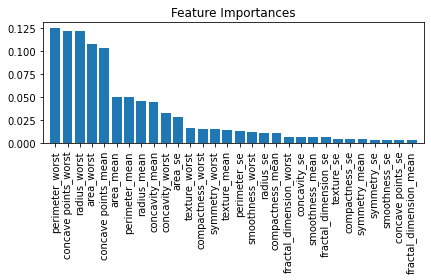

In [ ]:
feat_labels = X.columns
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for i in range(X_train.shape[1]) :
    print("%2d) %-*s %f" % (i + 1, 30, feat_labels[indices[i]],
                                        importances[indices[i]]))

plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")

plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation = 90)

plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()